# Customer Churn Analysis and Prediction

To analyze and predict customer churn in the telecom industry using the Telco customer dataset, identifying key factors influencing churn and developing a predictive model to support customer retention strategies.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['TotalCharges'].str.isspace().sum()

11

In [4]:
df[ df['TotalCharges'] == ' ' ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

## EDA

In [6]:
categorical_cols = df.select_dtypes('O').columns.to_list()
categorical_cols.insert(2, 'SeniorCitizen')
categorical_cols.remove('customerID')
print(categorical_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [7]:
len(categorical_cols)

17

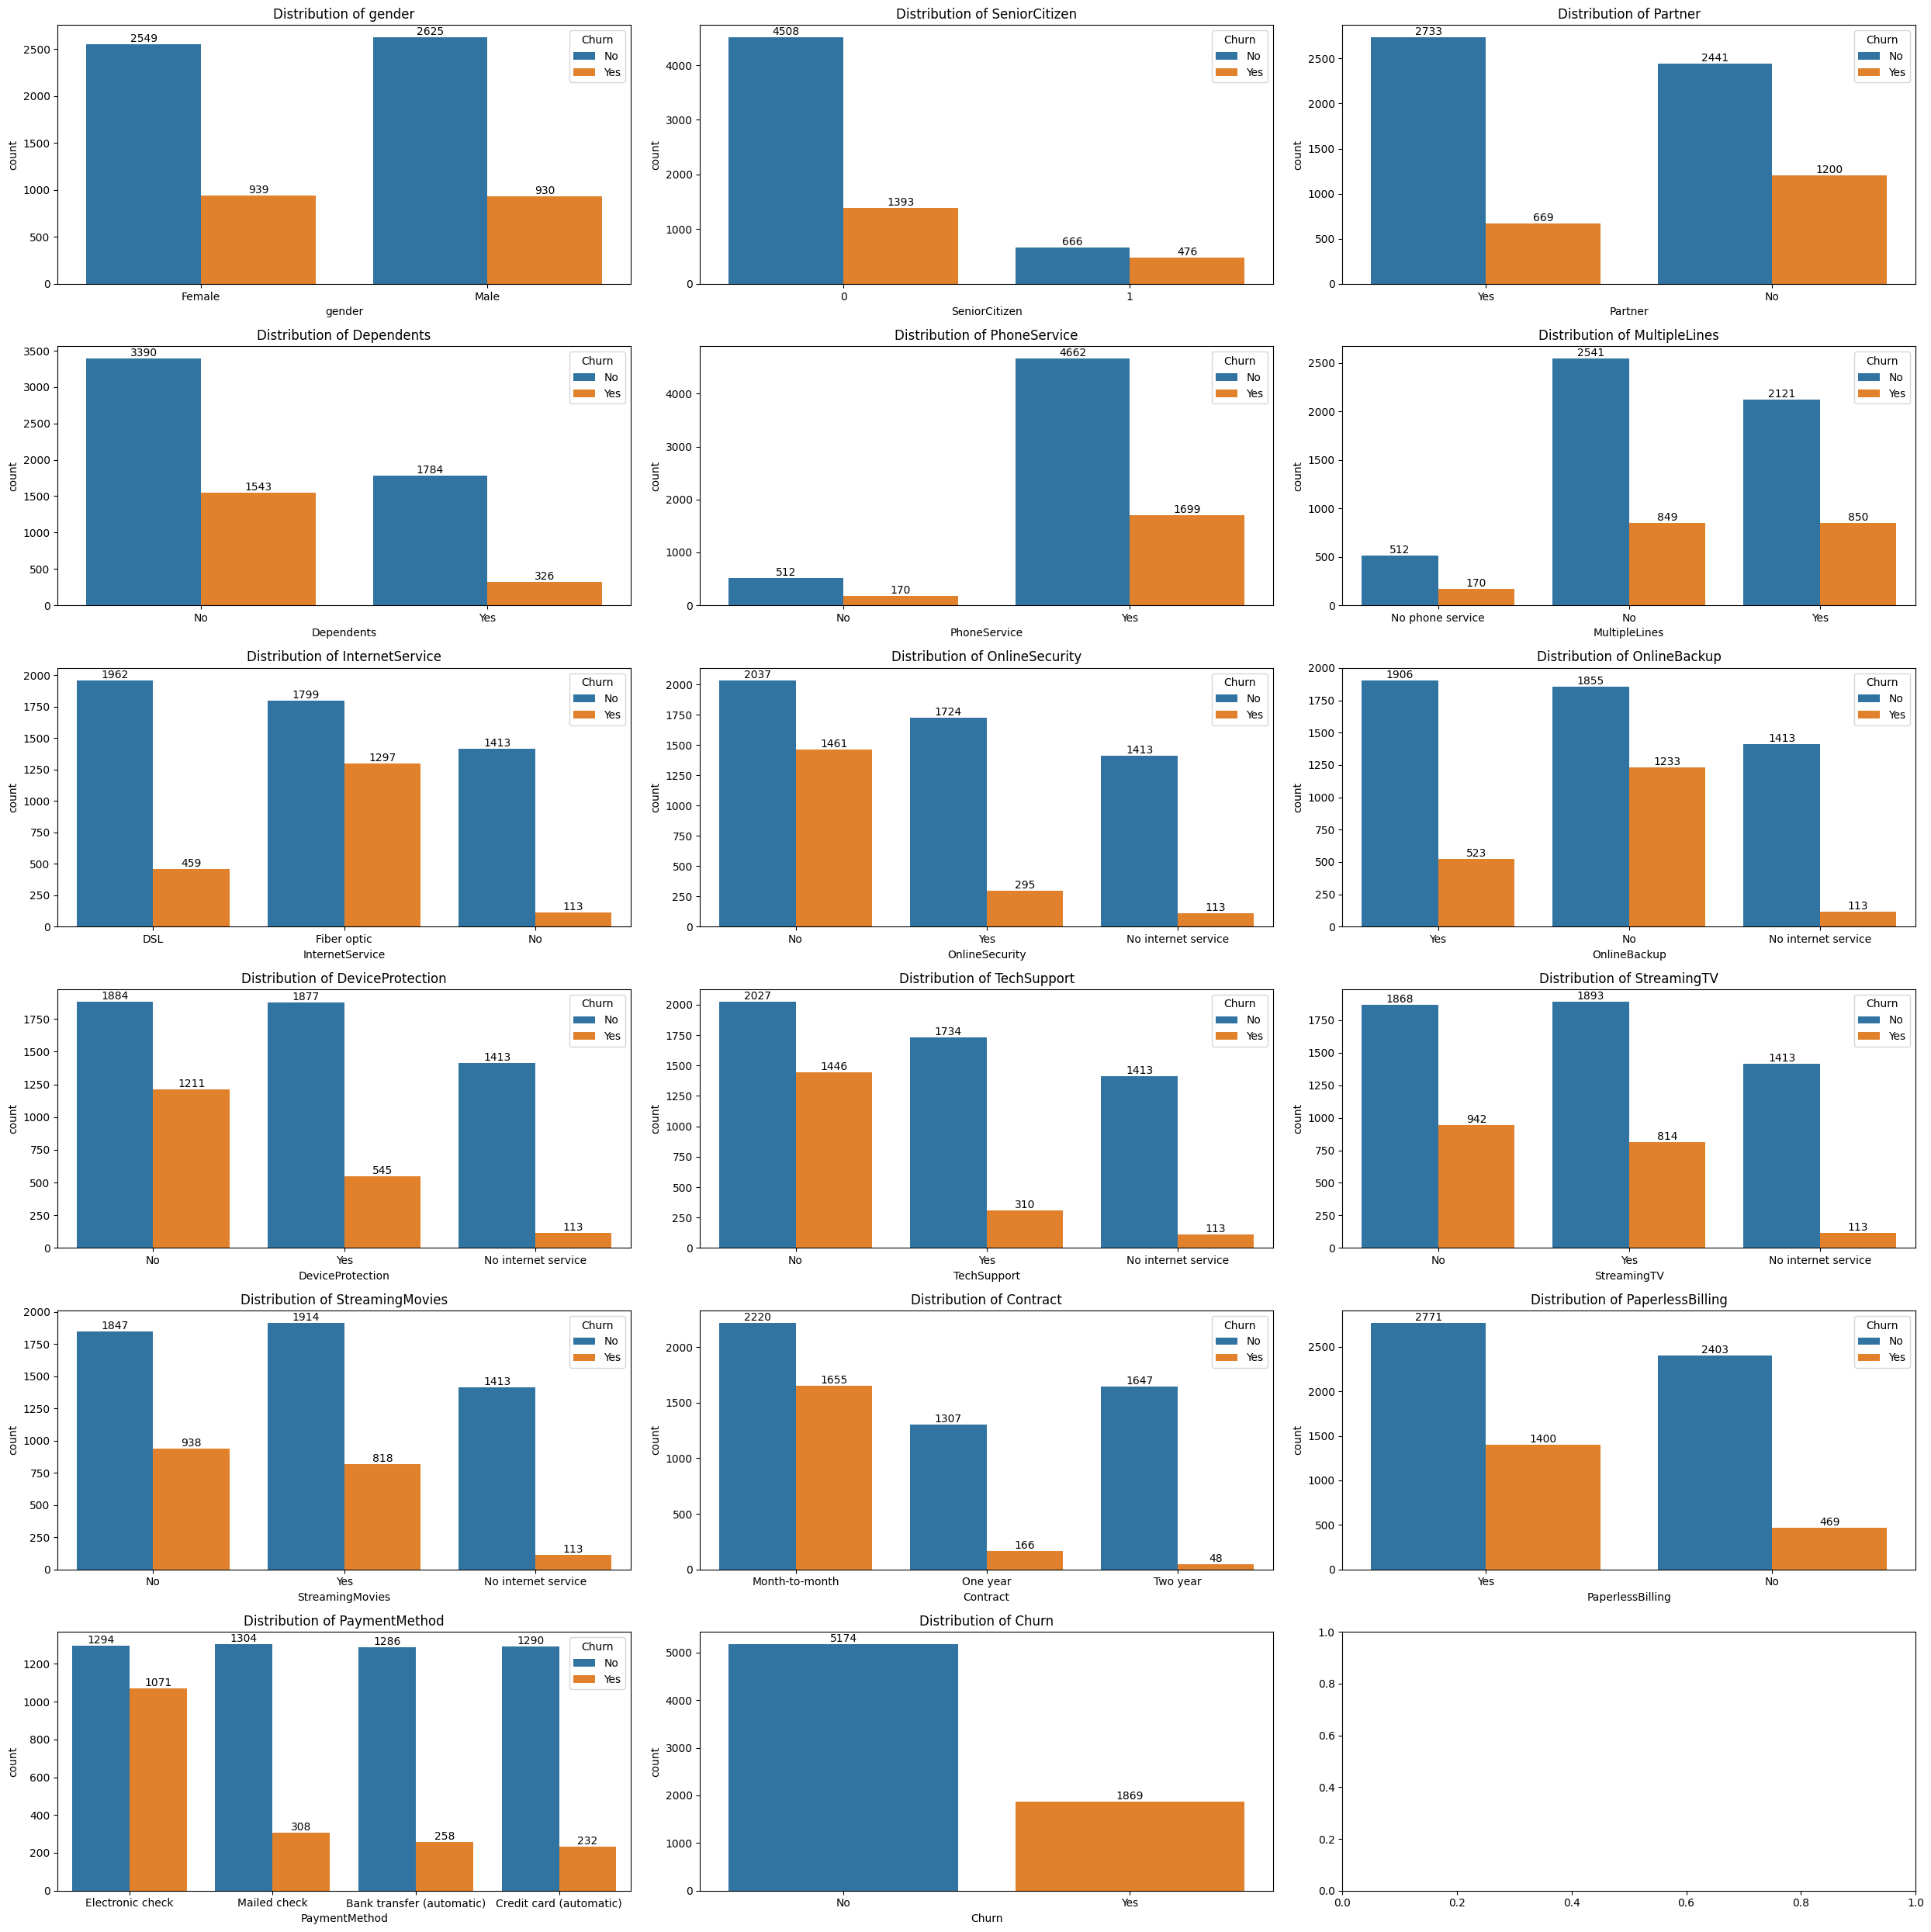

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i]).set_title(f'Distribution of {col}')
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
plt.show()

#### Insights on Distribution of Categorical Variables

**1. Gender Distribution**: The distribution of genders appears to be roughly balanced, with slightly more females than males.

**2. Senior Citizen Distribution**: A significantly smaller proportion of customers are senior citizens compared to non-senior citizens.

**3. Partner Distribution**: A higher proportion of customers have partners compared to those who don’t.

**4. Phone Service Distribution**: The majority of customers have phone service, with a small percentage not having it.

**5. Multiple Lines Distribution**: Among customers with phone service, a higher proportion have multiple lines compared to those with single lines.

**6. Internet Service Distribution**: Fiber optic is the most common internet service type, followed by DSL, and a smaller percentage have no internet service.

**7. Online Security Distribution**: A significant portion of customers do not have online security, indicating potential security risks.

**8. Online Backup Distribution**: Similar to online security, a substantial number of customers do not have online backup, suggesting a lack of data protection measures.

**9. Device Protection Distribution**: A considerable proportion of customers do not have device protection, potentially leaving them vulnerable to device malfunctions or data loss.

**10. Tech Support Distribution**: A large number of customers do not have tech support, which could be a concern for those who encounter technical difficulties.

**11. Streaming TV Distribution**: A significant portion of customers do not stream TV, indicating a preference for other forms of entertainment.

**12. Streaming Movies Distribution**: A similar trend is observed for streaming movies, with a large segment of customers not streaming movies.

**13. Contract Distribution**: Month-to-month contracts seem to be the most common, followed by two-year contracts, and one-year contracts are the least common.

**14. Paperless Billing Distribution**: A majority of customers opt for paperless billing, indicating a preference for electronic communication.

**15. Payment Method Distribution**: Electronic check and bank transfer are the most common payment methods, followed by credit card (automatic) and mailed check.

**16. Churn Distribution**: The overall churn rate appears to be relatively low.

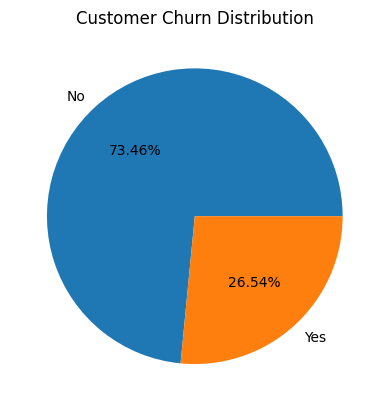

In [20]:
df['Churn'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title('Customer Churn Distribution')
plt.ylabel('')
plt.show()

In [9]:
numerical_cols = df.select_dtypes(exclude='O').columns.to_list()
numerical_cols.remove('SeniorCitizen')
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

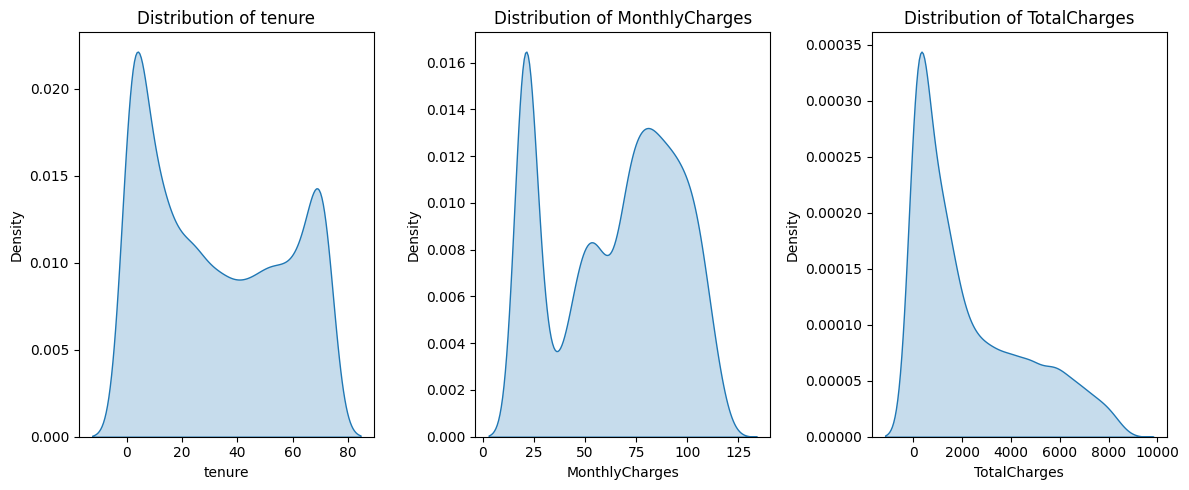

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True).set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [11]:
skewness = df[numerical_cols].skew()
skewness

,0
tenure,0.239540
MonthlyCharges,-0.220524
TotalCharges,0.963235


#### Insights on Distribution of Numerical Variables

**1. Distribution of Tenure**:
- The distribution of tenure appears to be **slightly right-skewed** with a skewness score of 0.24, suggesting the presence of distinct customer segments with varying tenure lengths. This could indicate different churn rates or loyalty levels across customer groups.

**2. Distribution of MonthlyCharges**:
- The distribution of MonthlyCharges is **left-skewed**, with a skewness score of -0.22. This suggests that most customers have relatively low monthly charges, with a smaller group of customers paying higher charges. This could point to an effective pricing strategy attracting many customers with lower-tier plans, though it may also reflect a lack of high-paying customers.

**3. Distribution of TotalCharges**:
- The distribution of TotalCharges is **right-skewed**, with a skewness score of 0.96. Most customers have accumulated lower total charges, which could be due to shorter tenure or lower monthly charges. This skewness indicates that the company's revenue is likely driven by a smaller segment of customers who have high total charges.


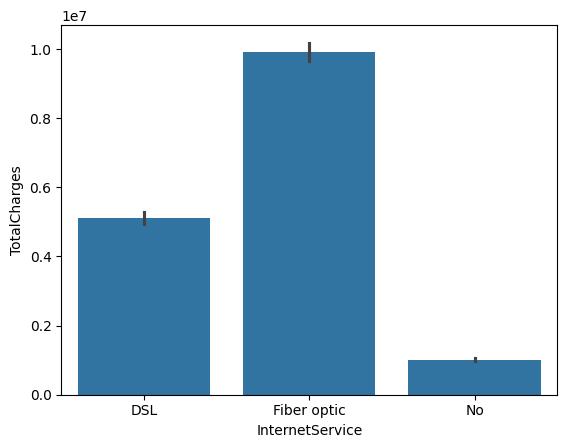

In [22]:
sns.barplot(x='InternetService', y='TotalCharges', data=df, estimator='sum')
plt.show()

Fiber Optic customers generate significantly higher TotalCharges compared to DSL and customers with No Internet Service. Customers with Fiber Optic internet service tend to have higher overall spending on services.

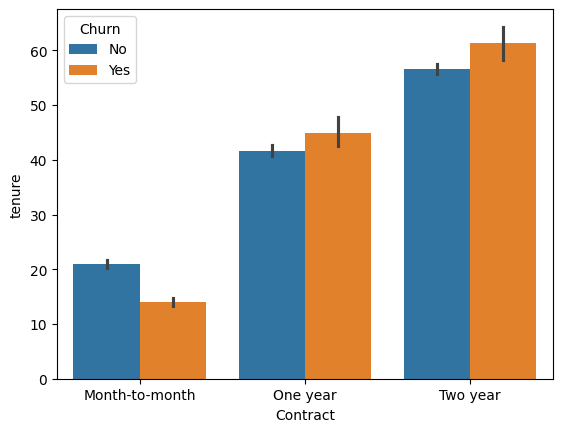

In [23]:
sns.barplot(x='Contract', y='tenure', hue='Churn', data=df)
plt.show()

- **Tenure and Churn**:

    - Customers with longer tenures are less likely to churn regardless of their contract type. This is evident from the increasing trend in tenure for both "No Churn" and "Yes Churn" groups as the contract duration increases.
    - However, the difference in tenure between "No Churn" and "Yes Churn" customers is most pronounced for the "Two year" contract group. This suggests that customers with two-year contracts and longer tenures are significantly less likely to churn compared to those with shorter contracts and tenures.

- **Contract Type and Churn**:

    - Customers with "Month-to-month" contracts have the lowest average tenure and the highest churn rate. This aligns with the expectation that shorter contracts provide less customer commitment and increase the likelihood of churn.
    - As the contract duration increases to "One year" and then "Two year", the average tenure of customers increases, and the churn rate decreases. This suggests that longer contracts help retain customers.

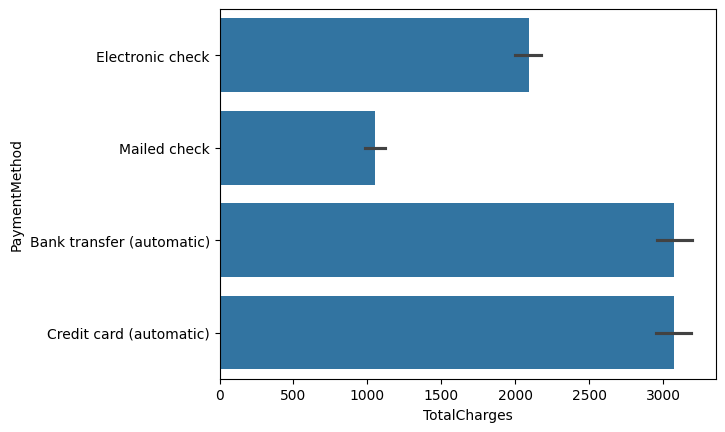

In [34]:
sns.barplot(y='PaymentMethod', x='TotalCharges', data=df)
plt.show()

- Customers who pay via Credit Card (Automatic) and Bank Transfer (Automatic) tend to have higher overall spending compared to those using other payment methods. This suggests that these automated payment methods might be associated with higher customer engagement and spending.

- Automated payment methods like credit card and bank transfers might be more convenient for customers, leading to higher usage and spending.

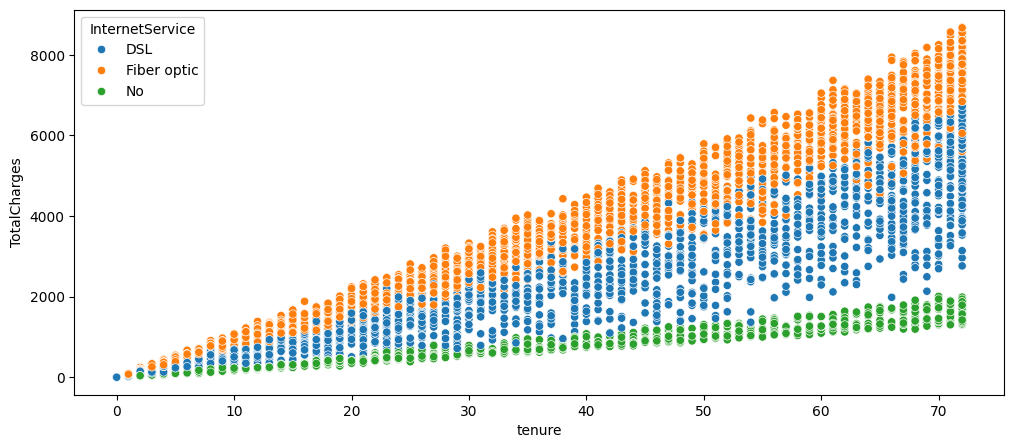

In [24]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='tenure', y='TotalCharges', hue='InternetService', data=df)
plt.show()

- There's a clear positive correlation between tenure and total charges. As tenure increases, total charges tend to increase. This is expected as customers with longer tenures would have accumulated more charges over time.

- Fiber Optic customers generally have higher total charges compared to DSL and No Internet Service customers, especially at longer tenures. This aligns with the previous bar plot analysis.

- Customers with Fiber Optic internet service are likely the most valuable customers in terms of revenue generation.

- Retention efforts could be targeted towards customers with shorter tenures to prevent churn and encourage them to increase their spending.

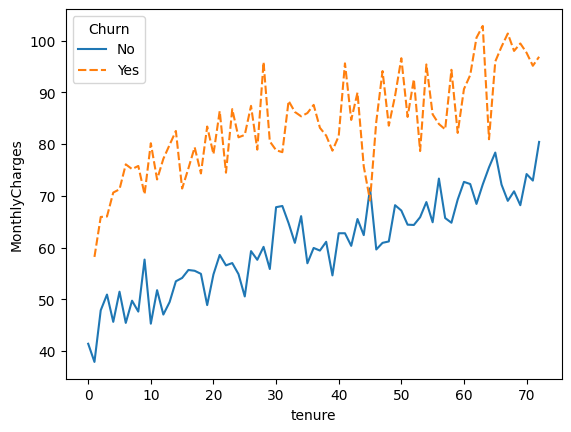

In [25]:
sns.lineplot(x='tenure', y='MonthlyCharges', hue='Churn', style='Churn', data=df, errorbar=None)
plt.show()

- Both churned and non-churned customers show an increasing trend in monthly charges with longer tenure, as longer tenures typically lead to higher spending.

- Churned customers tend to have slightly higher monthly charges at lower tenures, suggesting that higher initial charges may increase churn risk.

- At higher tenures, the difference in monthly charges between churned and non-churned customers diminishes, possibly indicating that long-tenured customers with high charges perceive higher service value and are less likely to churn.

- The company should investigate why customers with higher initial monthly charges are more likely to churn and whether dissatisfaction with perceived value is a factor.

- Retention strategies should focus on addressing the concerns of customers with high charges, particularly in the early stages of their subscription.

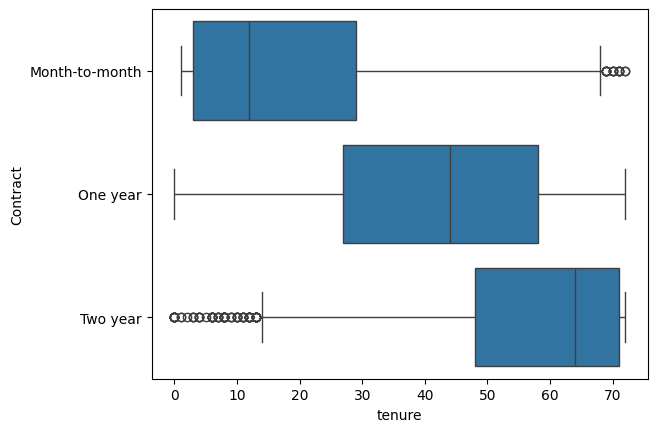

In [26]:
sns.boxplot(x=df['tenure'], y=df['Contract'])
plt.show()

- Month-to-month contracts show the widest range of tenures, with some customers staying long-term and others churning quickly.
- One-year contracts have a narrower range and higher median tenure than month-to-month contracts.
- Two-year contracts have the narrowest range and highest median tenure, indicating more stable, longer tenures.

*Inferences*:

- Contract type significantly impacts tenure, with longer contracts linked to more consistent and higher tenures.
- Outliers in month-to-month contracts show that some customers stay long-term, while others churn quickly.
- The company can leverage longer contracts to enhance retention and build stronger customer relationships.

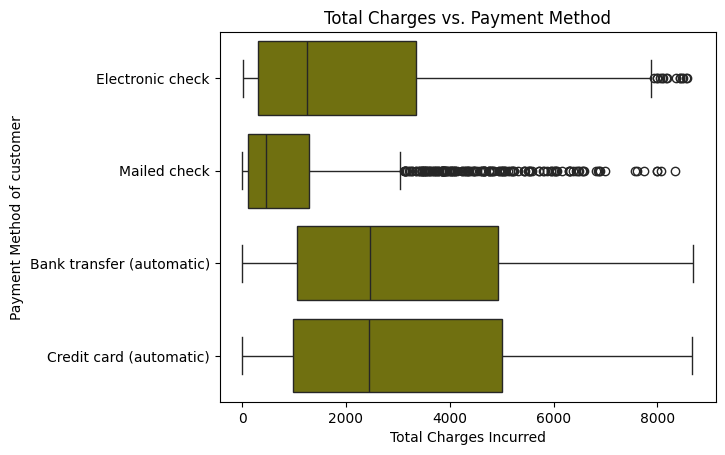

In [27]:
box_plot = sns.boxplot(x='TotalCharges', y='PaymentMethod', data=df, color='olive')
box_plot.set(xlabel="Total Charges Incurred", ylabel="Payment Method of customer", title= "Total Charges vs. Payment Method")
plt.show()

- Electronic Check customers have the highest median and range of total charges, indicating higher overall spending.
- Credit Card (Automatic) customers have the lowest median and range of total charges, suggesting lower spending.
- Bank Transfer (Automatic) and Mailed Check customers have similar median total charges, but Mailed Check shows a wider range with some outliers indicating higher spending.

*Inferences*:
- Electronic Check customers are likely the most valuable in terms of revenue. The company should explore strategies to encourage other customers to adopt this payment method.
- Credit Card (Automatic) customers may have lower spending potential. Targeted offers or promotions could help increase their spending.

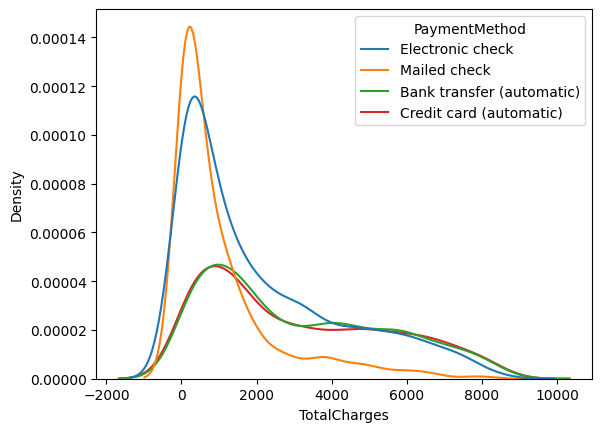

In [32]:
sns.kdeplot(data=df, x='TotalCharges', hue='PaymentMethod')
plt.show()

- Electronic Check customers have higher total charges with a longer tail, indicating a larger proportion of high spenders.
- Mailed Check customers show a wider distribution, with a pronounced peak at lower charges and a longer tail, indicating a broader range of spending.
- Bank Transfer (Automatic) and Credit Card (Automatic) customers have similar distributions, with a peak at lower charges and a shorter tail, suggesting lower overall spending.

*Inferences*:
- The density plot confirms that **Electronic Check** customers have the highest spending, followed by **Mailed Check** customers.
- **Bank Transfer (Automatic)** and **Credit Card (Automatic)** customers spend less than the other two groups.
- The company can use these insights to tailor marketing strategies, offering targeted promotions to increase spending among lower-spending customers.



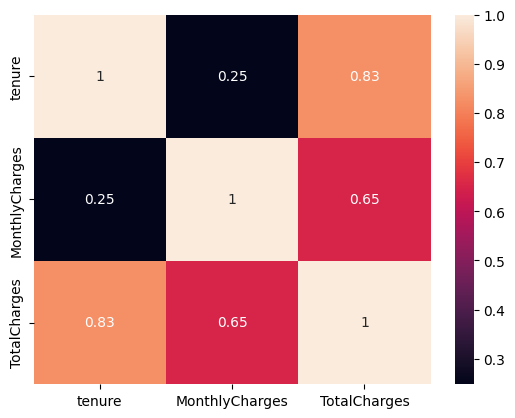

In [31]:
sns.heatmap(df[numerical_cols].corr(), annot=True)
plt.show()

- The strong correlation between Monthly Charges and Total Charges highlights the importance of monthly charges as a key driver of overall revenue.
- The moderate correlation between Tenure and Total Charges suggests that customer loyalty and retention play a role in revenue generation.
- The moderate correlation between Tenure and Monthly Charges indicates that longer-tenure customers might be more likely to upgrade their services or opt for higher-priced plans.

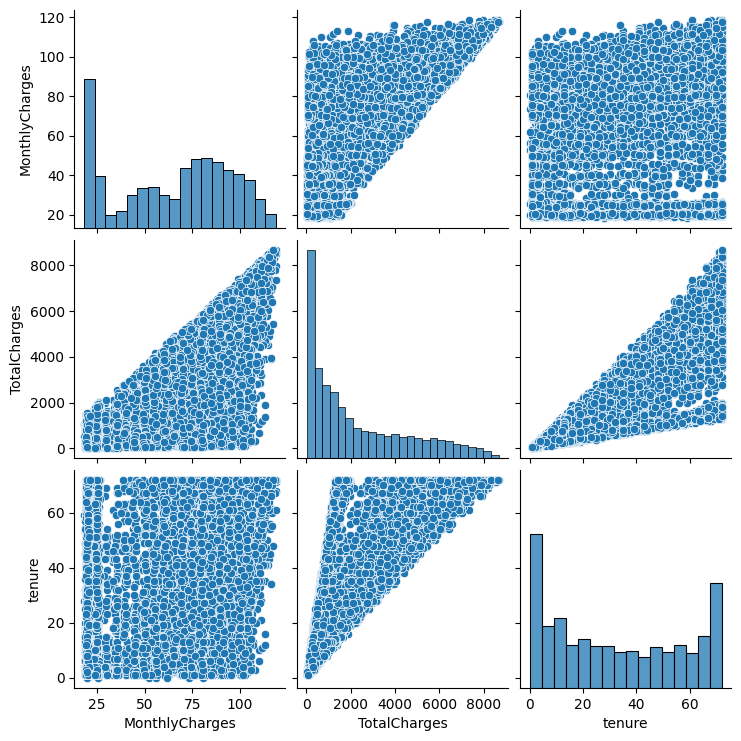

In [ ]:
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure']])
plt.show()

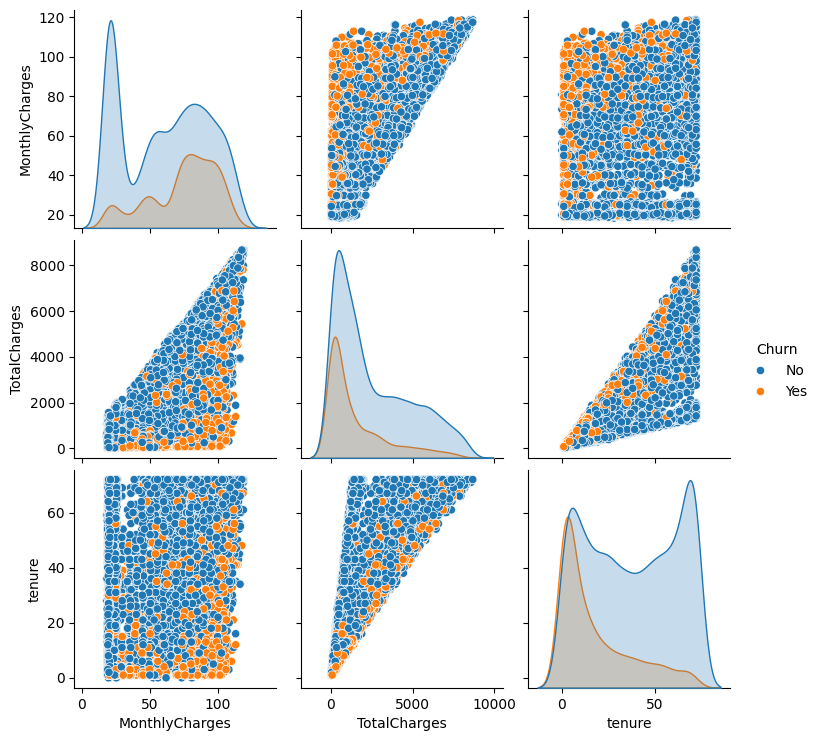

In [ ]:
sns.pairplot(data=df, vars=['MonthlyCharges', 'TotalCharges', 'tenure'], hue='Churn')
plt.show()

- The pair plot confirms the strong relationship between Monthly Charges, Total Charges, and Tenure.
- Customers with higher monthly charges and longer tenures are more likely to churn.
- The company should focus on retaining customers with higher monthly charges and longer tenures.
- Strategies to encourage long-term value perception and loyalty among high-spending customers could be beneficial in reducing churn.

## Pre-Processing

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X = df.drop(columns=['customerID', 'Churn'])  # Features
y = df['Churn']    # Target

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

SelectKBest()

In [ ]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
X_selected = X[selected_features]

In [ ]:
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
14,Contract,1315.088872
4,tenure,997.268010
8,OnlineSecurity,643.162019
11,TechSupport,610.610024
18,TotalCharges,288.278961
9,OnlineBackup,279.877370
17,MonthlyCharges,273.463704
15,PaperlessBilling,268.985218
10,DeviceProtection,230.744618
3,Dependents,195.149314


In [ ]:
feature_scores[:10]['Feature'].values

array(['Contract', 'tenure', 'OnlineSecurity', 'TechSupport',
       'TotalCharges', 'OnlineBackup', 'MonthlyCharges',
       'PaperlessBilling', 'DeviceProtection', 'Dependents'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=55)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
X_train.head(3)

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
486,0,-0.707595,0,2,0,0,0,1,1.170813,-0.385955
3378,0,1.612528,2,2,2,2,2,0,0.649456,1.640813
5520,0,0.920562,2,0,2,0,1,1,0.642815,1.007407


## Classifier Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Initialize an empty dictionary to store the results
results = {}

# Iterate through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the results
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T
results_df

,Accuracy,F1 Score
Logistic Regression,0.800114,0.605381
K-Nearest Neighbors,0.783646,0.561565
Decision Tree,0.737649,0.514706
Random Forest,0.779103,0.541814
Support Vector Classifier,0.791596,0.542964
Naive Bayes,0.751278,0.630691
XGBoost,0.796139,0.587830


**Logistic Regression** is the best performer overall with the highest accuracy (0.8001) and a competitive F1 score (0.6053).

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1139,  139],
       [ 213,  270]])

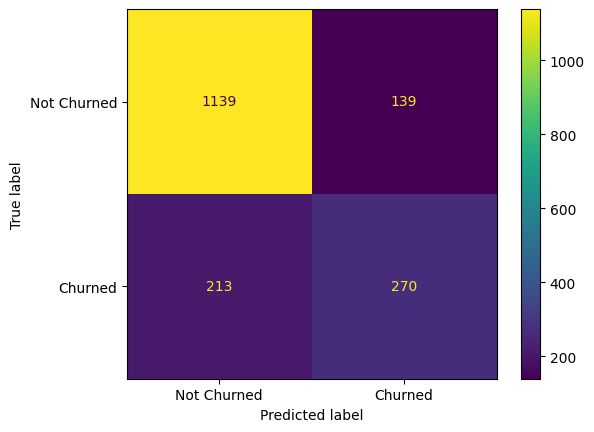

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Not Churned', 'Churned'])
plt.show()

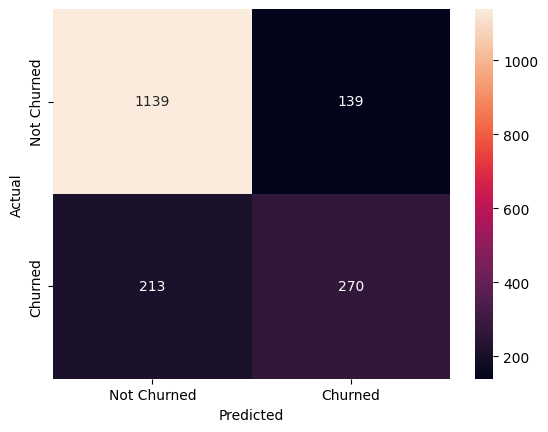

In [ ]:
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=4)

# Print header
print(f"{'Classifier':<25} {'Mean Accuracy':<20} {'Mean F1 Score':<20}")

# Iterate through classifiers and perform cross-validation
for name, clf in classifiers.items():
    accuracy_scores = cross_val_score(clf, X_selected, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(clf, X_selected, y, cv=kf, scoring='f1_weighted')
    print(f"{name:<25} {accuracy_scores.mean():<20.4f} {f1_scores.mean():<20.4f}")

Classifier                Mean Accuracy        Mean F1 Score       
Logistic Regression       0.8004               0.7960              
K-Nearest Neighbors       0.7667               0.7564              
Decision Tree             0.7305               0.7308              
Random Forest             0.7808               0.7700              
Support Vector Classifier 0.7346               0.6223              
Naive Bayes               0.7443               0.7564              
XGBoost                   0.7825               0.7762              


### Hyperparameter Tuning Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example model
model = RandomForestClassifier()

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.7961539180416424


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Hypertuned: \t Accuracy = {accuracy:.4f}, \t F1 Score = {f1:.4f}")

Random Forest Hypertuned: 	 Accuracy = 0.7999, 	 F1 Score = 0.5877


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1032
           1       0.65      0.53      0.59       377

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



## Model Comparison

Upon comparing the performance of the original **Logistic Regression** model and the hypertuned **Random Forest** model:

### Results
- **Logistic Regression:**
  - Accuracy: **0.8001**
  - F1 Score: **0.6053**
  
- **Random Forest Hypertuned:**
  - Accuracy: **0.7999**
  - F1 Score: **0.5877**

### Conclusion
The original Logistic Regression model outperforms the hypertuned Random Forest in both accuracy and F1 score. This suggests that Logistic Regression may be more effective for this dataset, particularly in addressing class imbalance and providing a more balanced measure of precision and recall.

# ROC Curve and AUC

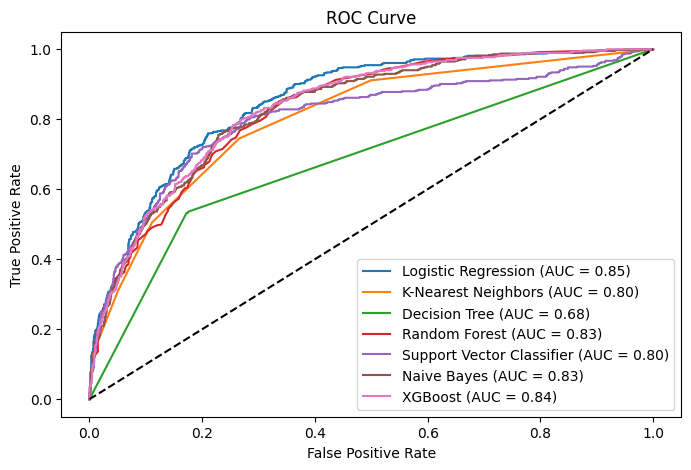

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Final Conclusion

The ROC curve analysis further supports the findings from the initial evaluation, indicating that the Logistic Regression model achieves the highest AUC among the tested classifiers. This reinforces the conclusion that Logistic Regression is particularly effective for this dataset, offering superior performance in distinguishing between classes and addressing class imbalance.